In [1]:
# Import the primary data analysis libraries
import matplotlib.pyplot as plt
import numpy as np 
import scipy as sp
from scipy import signal
import pandas as pd

In [2]:
import os
log_path = 'data'
for filename in os.listdir(log_path):
    print(filename)
odf1 = pd.read_csv(log_path+'/SL3T_20210605_115300.csv').dropna()
odf2 = pd.read_csv(log_path+"/SL3B_20210605_120101.csv").dropna();
chest = pd.read_csv(log_path+"/chest_20210605_134859.csv").dropna();
idle = pd.read_csv(log_path+"/idle_20210605_140613.csv").dropna();
#df3 = pd.read_csv(log_path+"/SL3T.csv").dropna();
odf1['timestamp'] = pd.to_datetime(odf1.timestamp, unit='ms')
odf2['timestamp'] = pd.to_datetime(odf2.timestamp, unit='ms')
chest['timestamp'] = pd.to_datetime(chest.timestamp, unit='ms')
idle['timestamp'] = pd.to_datetime(idle.timestamp, unit='ms')
#df3['timestamp'] = pd.to_datetime(df3.timestamp, unit='ms')
#df1['timestamp'] = df1['timestamp'].apply(str).str[-5:].apply(int)
#df2['timestamp'] = df2['timestamp'].apply(str).str[-5:].apply(int)
#df3['timestamp'] = df3['timestamp'].apply(str).str[-5:].apply(int)

chest_20210605_134859.csv
Idle.csv
idle_20210605_140613.csv
raw.csv
SA3T.csv
SL3B.csv
SL3B_20210605_120101.csv
SL3D_n.csv
SL3T.csv
SL3T_20210605_115300.csv
SL3T_n.csv


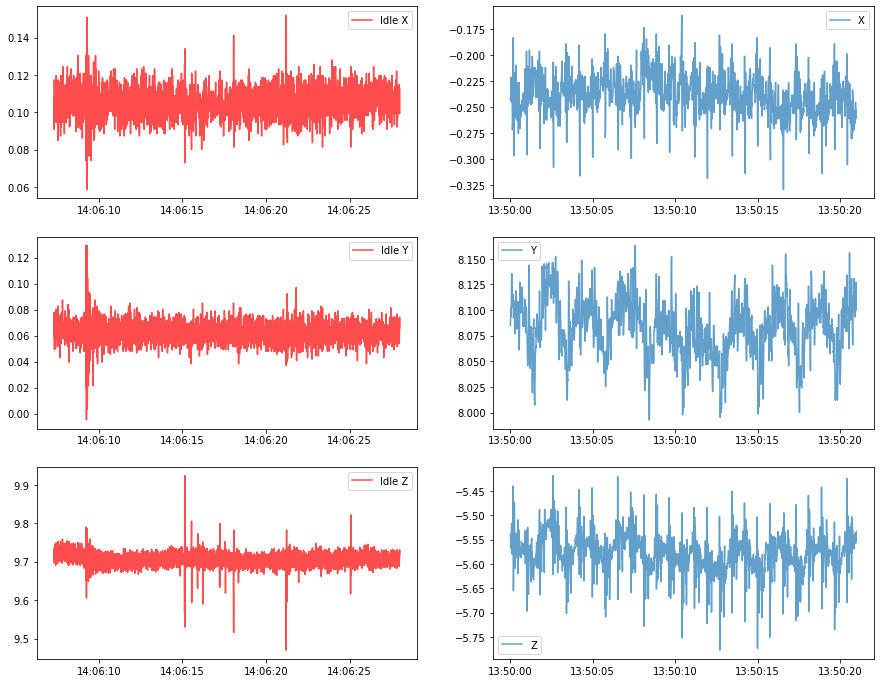

In [99]:
chest.index = chest.timestamp
idle.index = idle.timestamp
chest = chest['2021-06-05 13:50:00.000':'2021-06-05 13:50:20.000']
idle = idle['2021-06-05 14:06:07':'2021-06-05 14:06:27']
fig, ax = plt.subplots(3,2, figsize=(15,12))
ax[0,0].plot(idle.timestamp, idle.X, alpha=0.7, color="r")
ax[1,0].plot(idle.timestamp, idle.Y, alpha=0.7, color="r")
ax[2,0].plot(idle.timestamp, idle.Z, alpha=0.7, color="r")
ax[0,1].plot(chest.timestamp, chest.X, alpha=0.7)
ax[1,1].plot(chest.timestamp, chest.Y, alpha=0.7)
ax[2,1].plot(chest.timestamp, chest.Z, alpha=0.7)
#ax.plot(chest.timestamp, np.sqrt(chest.X**2+chest.Y**2+chest.Z))
ax[0,0].legend(['Idle X']);ax[1,0].legend(['Idle Y']);ax[2,0].legend(['Idle Z'])
ax[0,1].legend('X');ax[1,1].legend('Y');ax[2,1].legend('Z')


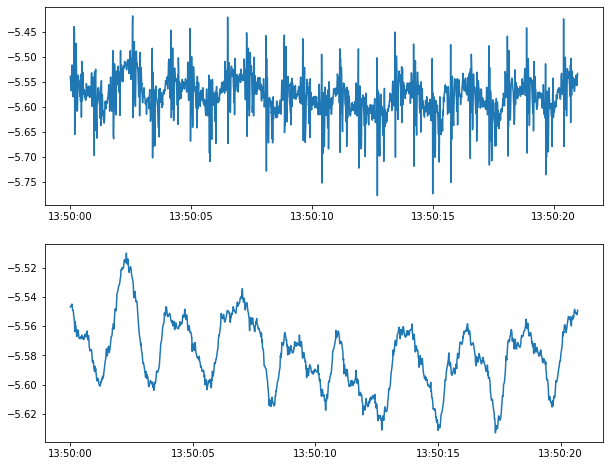

In [138]:
filterLength = 30
chest_convolve5 = np.convolve(chest.Z,np.ones(filterLength)/filterLength, mode='valid')
fig, ax = plt.subplots(2,1, figsize=(10,8))
ax[0].plot(chest.timestamp, chest.Z)
ax[1].plot(chest.timestamp[:-(filterLength-1)], chest_convolve5)


In [3]:
#filter the part of signal which does not correspond to walking
odf1.index = odf1.timestamp; odf2.index = odf2.timestamp
odf1 = odf1['2021-06-05 11:53:10':'2021-06-05 11:53:25']
odf2 = odf2['2021-06-05 12:01:05':'2021-06-05 12:01:20']

-------
Printing Stats
-------
**Accel stats TYPE 1**
Length (raw diff): 15 secs
Avg x: 1.55 (SD=2.41)
Avg y: -9.87 (SD=3.49)
Avg z: -1.29 (SD=3.61)
Avg mag: 10.27 (SD=3.31)


**Accel stats TYPE 2**
Length (raw diff): 15 secs
Avg x: -1.53 (SD=1.66)
Avg y: 9.60 (SD=3.36)
Avg z: -1.29 (SD=2.99)
Avg mag: 9.77 (SD=3.45)
Length (raw diff): 15 secs
Length (rounded ceiling): 16 secs
***TYPE 1***
Coarse sampling rate: 50.40 samples/sec
More precise sampling rate calc: 47.25 samples/sec (SD=2.46 samples/sec)


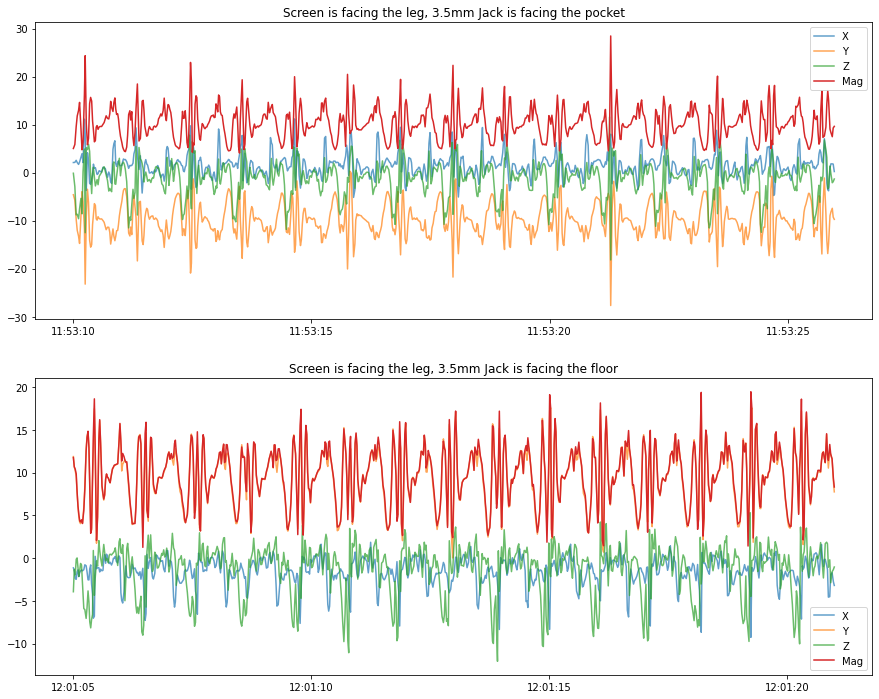

In [4]:
#downsample
df1 = odf1.iloc[::2,:]
df2 = odf2.iloc[::2,:]
fig, ax = plt.subplots(2,1, figsize=(15,12), )
ax[0].plot(df1.timestamp, df1.X, alpha=0.7)
ax[0].plot(df1.timestamp, df1.Y, alpha=0.7)
ax[0].plot(df1.timestamp, df1.Z, alpha=0.7)
ax[0].plot(df1.timestamp, np.sqrt(df1.X**2+df1.Y**2+df1.Z))
ax[0].set_title('Screen is facing the leg, 3.5mm Jack is facing the pocket')
ax[0].legend(['X', 'Y', 'Z', 'Mag'])


ax[1].plot(df2.timestamp, df2.X, alpha=0.7)
ax[1].plot(df2.timestamp, df2.Y, alpha=0.7)
ax[1].plot(df2.timestamp, df2.Z, alpha=0.7)
ax[1].plot(df2.timestamp, np.sqrt(df2.X**2+df2.Y**2+df2.Z))
ax[1].set_title('Screen is facing the leg, 3.5mm Jack is facing the floor')
ax[1].legend(['X', 'Y', 'Z', 'Mag'])
print("-------\nPrinting Stats\n-------")
#printing some stats 
acc1_mag = np.sqrt(df1.X**2+df1.Y**2+df1.Z)
print("**Accel stats TYPE 1**")
sample_time_in_s = df1.timestamp.iloc[-1] - df1.timestamp.iloc[0]
print("Length (raw diff): {} secs".format(sample_time_in_s.seconds))
print("Avg x: {:.2f} (SD={:.2f})".format(np.mean(df1.X), np.std(df1.X)))
print("Avg y: {:.2f} (SD={:.2f})".format(np.mean(df1.Y), np.std(df1.Y)))
print("Avg z: {:.2f} (SD={:.2f})".format(np.mean(df1.Z), np.std(df1.Z)))
print("Avg mag: {:.2f} (SD={:.2f})\n\n".format(np.mean(acc1_mag), np.std(acc1_mag)))

acc2_mag = np.sqrt(df2.X**2+df2.Y**2+df2.Z)
print("**Accel stats TYPE 2**")
sample_time_in_s2 = df2.timestamp.iloc[-1] - df2.timestamp.iloc[0]
print("Length (raw diff): {} secs".format(sample_time_in_s2.seconds))
print("Avg x: {:.2f} (SD={:.2f})".format(np.mean(df2.X), np.std(df2.X)))
print("Avg y: {:.2f} (SD={:.2f})".format(np.mean(df2.Y), np.std(df2.Y)))
print("Avg z: {:.2f} (SD={:.2f})".format(np.mean(df2.Z), np.std(df2.Z)))
print("Avg mag: {:.2f} (SD={:.2f})".format(np.mean(acc2_mag), np.std(acc2_mag)))
#Derive sampling rate for TYPE 1
sample_time_in_s = df1.timestamp.iloc[-1] - df1.timestamp.iloc[0]
map_sec_to_sample_count = dict()
for timestamp_ms in df1.timestamp:
    sec_floor = timestamp_ms.second
    if sec_floor not in map_sec_to_sample_count:
        map_sec_to_sample_count[sec_floor] = 0
    map_sec_to_sample_count[sec_floor] = map_sec_to_sample_count[sec_floor] + 1

print("Length (raw diff): {} secs".format(sample_time_in_s.seconds))
print("Length (rounded ceiling): {} secs".format(len(map_sec_to_sample_count)))
print("***TYPE 1***")
counts = list(map_sec_to_sample_count.values())
np_counts = np.array(counts)
sampling_rate_imprecise = df1.timestamp.size / sample_time_in_s.seconds
print("Coarse sampling rate: {:.2f} samples/sec".format(sampling_rate_imprecise))
sampling_rate = np.average(np_counts)
print("More precise sampling rate calc: {:.2f} samples/sec (SD={:.2f} samples/sec)".format(sampling_rate, np.std(np_counts)))


In [5]:
# Perform some simple frequency analysis. What is the "frequency" of a walk?

# fourier transformations and frequency-based features
num_samples = len(acc1_mag)

# the mean substraction removes the y offset before performing FFT
fft = np.abs(np.fft.fft(acc1_mag - np.mean(acc1_mag)))
freqs = np.fft.fftfreq(len(fft))
freqs = freqs * sampling_rate # convert normalized freq bins to our freq bins

print("We have {} frequency bins of size {}Hz from {} to {}Hz".\
      format(len(freqs), (freqs[1]-freqs[0]), freqs[0], np.abs(freqs[num_samples//2])))
freqs = freqs[range(num_samples//2)] # one side freq range, integer division
abs_fft = np.abs(fft)[range(num_samples//2)] # one side freq range, integer division
abs_fft_normalized = abs_fft / num_samples # normalize to values 0 - 1

# find the max frequency
max_freq_idx = np.argmax(abs_fft_normalized)
max_freq = freqs[max_freq_idx]
print("The max frequency is: {} Hz".format(max_freq))

# find the top N frequencies
# see: https://stackoverflow.com/questions/10337533/a-fast-way-to-find-the-largest-n-elements-in-an-numpy-array?lq=1
top_n_freq = 3
ind = np.argpartition(abs_fft_normalized, -top_n_freq)[-top_n_freq:] # from https://stackoverflow.com/a/23734295
ind_sorted_by_coef = ind[np.argsort(-abs_fft_normalized[ind])] # reverse sort indices

# I appear to walk at ~1.6 Hz :)
print("Top 3 frequencies (freq, coef):", list(zip(freqs[ind_sorted_by_coef], abs_fft_normalized[ind_sorted_by_coef]))) # print top freq
top1_freq = freqs[ind_sorted_by_coef][0]
top2_freq = freqs[ind_sorted_by_coef][0]
top3_freq = freqs[ind_sorted_by_coef][0]

We have 756 frequency bins of size 0.0625Hz from 0.0 to 23.625Hz
The max frequency is: 1.8125 Hz
Top 3 frequencies (freq, coef): [(1.8125, 0.9628248275272839), (1.875, 0.4956101430669864), (1.75, 0.44165956712801224)]


Sampling rate: 47.25 Hz
Maximum detectable frequency in our signal is: 23.62 Hz (due to Nyquist theorem)


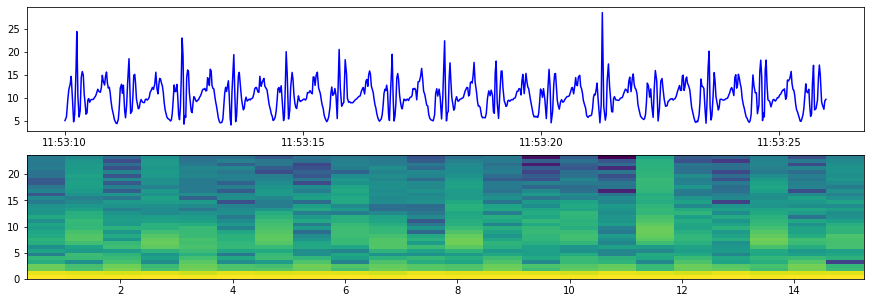

In [6]:
import math
# Visualize the frequency data. In this spectrogram plot, the y-axis is frequency
# and the x-axis is time. 
print("Sampling rate: {:0.2f} Hz".format(sampling_rate))
print("Maximum detectable frequency in our signal is: {:.2f} Hz (due to Nyquist theorem)".format(sampling_rate/2.0))

NFFT = 64       # the length of the windowing segments
fig, (axes1, axes2) = plt.subplots(2, 1, figsize=(15, 5)) # create two rows, one col of plots

axes1.plot(acc1_mag, 'b-', label="netMag Accel")
Pxx, freqs, bins, im = axes2.specgram(acc1_mag, NFFT=NFFT, Fs=sampling_rate, noverlap=math.ceil(NFFT/2.0))

Average of the signal [Before] = 10.273475179830651
Average of the signal [After] = -2.502407452329718e-16


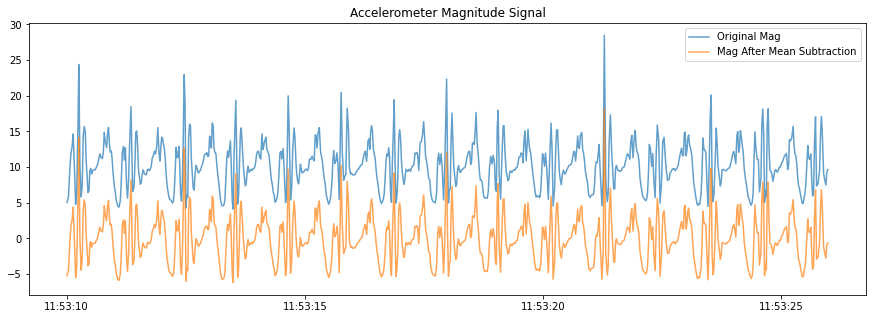

In [7]:
#Here, we'll subtract out the mean so that the average of the signal is 0
#useful to count ZCR
mag_after_mean_subtraction = acc1_mag - np.average(acc1_mag)
print("Average of the signal [Before] = {}".format(np.average(acc1_mag)))
print("Average of the signal [After] = {}".format(np.average(mag_after_mean_subtraction)))
fig, axes = plt.subplots(1, figsize=(15, 5)) #figsize is width, height
axes.plot(acc1_mag, alpha=0.7, label="Original Mag")
axes.plot(mag_after_mean_subtraction, alpha=0.7, label="Mag After Mean Subtraction")
axes.set_title("Accelerometer Magnitude Signal")
axes.legend();

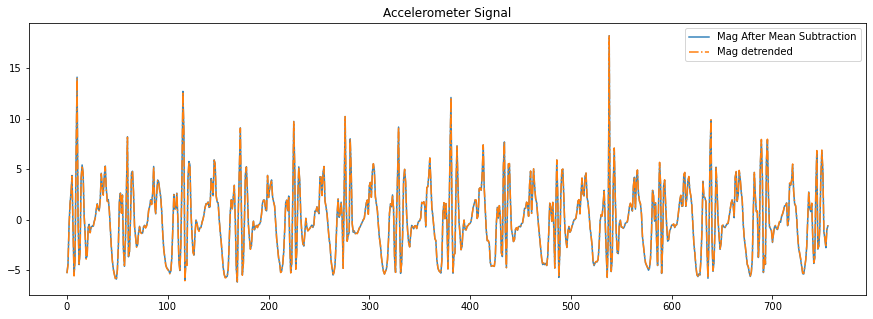

In [8]:
# We can also use scipy's built in detrend algorithm, which is the result
# of a linear least-squares fit to the data
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.detrend.html
mag_detrended = sp.signal.detrend(acc1_mag) 
fig, axes = plt.subplots(1, figsize=(15, 5)) #figsize is width, height
axes.plot(mag_after_mean_subtraction.values, alpha=0.9, label="Mag After Mean Subtraction")
axes.plot(mag_detrended, alpha=1, linestyle="-.", label="Mag detrended")
axes.set_title("Accelerometer Signal")
axes.legend()

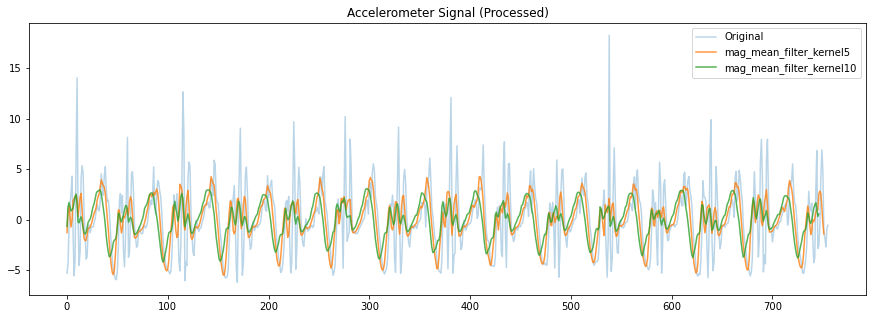

In [9]:
# Here are different mean smoothing filters
# Note that the filter window size should really be a function of your sampling rate

# Now, let's play around with various smoothing methods
# Here are different mean smoothing filters
# Note that the filter window size should really be a function of your sampling rate
filter_window_size = 5

# Convolve using a mean filter
# https://numpy.org/doc/stable/reference/generated/numpy.convolve.html?highlight=convolve#numpy.convolve
mag_mean_filter_kernel5 = np.convolve(mag_detrended, 
                           np.ones((filter_window_size,))/filter_window_size, 
                           mode='valid')

filter_window_size = 10
mag_mean_filter_kernel10 = np.convolve(mag_detrended, 
                           np.ones((filter_window_size,))/filter_window_size, 
                           mode='valid')

fig, axes = plt.subplots(1, figsize=(15, 5)) #figsize is width, height

# axes.plot(accel_mag, alpha=0.7, label="Original Mag")
axes.plot(mag_detrended, alpha=0.3, label="Original")
axes.plot(mag_mean_filter_kernel5, alpha=0.8, label="mag_mean_filter_kernel5")
axes.plot(mag_mean_filter_kernel10, alpha=0.8, label="mag_mean_filter_kernel10")


# set the title and show the legend
axes.set_title("Accelerometer Signal (Processed)")
axes.legend()

In [11]:
sampling_rate

47.25

Min num samples between peaks: 18.900000000000002
We've detected: 15 initial peaks
Average peak: 3.7352749542761368 SD= 0.38230303282752065
Min peak: 3.0269344332960277
Max peak: 4.2494512589005415

We've detected: 14 initial peaks in the inverted signal
Average peak: -4.864852756296103 SD= 0.361689740274095
Min peak: -5.494184180183627
Max peak: -4.25233160711274

Filtering out peaks that exceed our maximum:
Now, we've detected: 15  peaks
Average peak: 3.7352749542761368 SD= 0.38230303282752065
Min peak: 3.0269344332960277
Max peak: 4.2494512589005415

Now, we've detected: 14  peaks
Average peak: -4.864852756296103 SD= 0.361689740274095
Min peak: -5.494184180183627
Max peak: -4.25233160711274



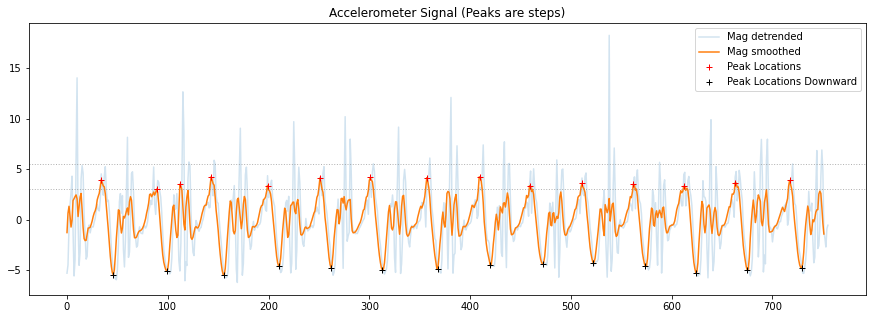

In [33]:
# Now, basic algorithm to infer steps
filter_window_size = math.ceil(sampling_rate * 0.1)

# Convolve using a mean filter
# https://numpy.org/doc/stable/reference/generated/numpy.convolve.html?highlight=convolve#numpy.convolve
mag_filtered = np.convolve(mag_detrended, 
                           np.ones((filter_window_size,))/filter_window_size, 
                           mode='valid')



fig, axes = plt.subplots(1, figsize=(15, 5)) #figsize is width, height

# axes.plot(accel_mag, alpha=0.7, label="Original Mag")
axes.plot(mag_detrended, alpha=0.2, label="Mag detrended")
axes.plot(mag_filtered, alpha=1, label="Mag smoothed")
#axes.plot(-mag_filtered,alpha=1,label="Mag smoothed -inverted")


# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html
# assume stride cadence threshold of ~100 steps/min, which is 1.6 steps/sec
# but let's round it up to ~2 steps/sec (so, 2 Hz)
# so, once we find a peak, we should wait ~0.5 seconds, which we translate into num of samples
min_distance_between_peaks = 0.4 * sampling_rate # distance between peaks in samples
min_peak_height = 3
max_peak_height = 5.5


print("Min num samples between peaks:", min_distance_between_peaks)
peak_indices, peak_properties = sp.signal.find_peaks(mag_filtered, height=min_peak_height, distance=min_distance_between_peaks)
peak_indices_i, peak_properties_i = sp.signal.find_peaks(-mag_filtered, height=min_peak_height, distance=min_distance_between_peaks)

print("We've detected:", len(peak_indices), "initial peaks")
print("Average peak:", np.average(mag_filtered[peak_indices]), "SD=", np.std(mag_filtered[peak_indices]))
print("Min peak:", np.min(mag_filtered[peak_indices]))
print("Max peak:", np.max(mag_filtered[peak_indices]))
print();
print("We've detected:", len(peak_indices_i), "initial peaks in the inverted signal")
print("Average peak:", np.average(mag_filtered[peak_indices_i]), "SD=", np.std(mag_filtered[peak_indices_i]))
print("Min peak:", np.min(mag_filtered[peak_indices_i]))
print("Max peak:", np.max(mag_filtered[peak_indices_i]))
print();

print("Filtering out peaks that exceed our maximum:")

# filter out peaks that exceed our maximum
filtered_peak_indices = []
for peak_index in peak_indices:
    if(mag_filtered[peak_index] <= max_peak_height):
        filtered_peak_indices.append(peak_index)
        
filtered_peak_indices_i = []
for peak_index in peak_indices_i:
    if(mag_filtered[peak_index] <= max_peak_height):
        filtered_peak_indices_i.append(peak_index)
       

peak_indices = list(filtered_peak_indices)
print("Now, we've detected:", len(peak_indices), " peaks")
print("Average peak:", np.average(mag_filtered[peak_indices]), "SD=", np.std(mag_filtered[peak_indices]))
print("Min peak:", np.min(mag_filtered[peak_indices]))
print("Max peak:", np.max(mag_filtered[peak_indices]))
print();

peak_indices_i = list(filtered_peak_indices_i)
print("Now, we've detected:", len(peak_indices_i), " peaks")
print("Average peak:", np.average(mag_filtered[peak_indices_i]), "SD=", np.std(mag_filtered[peak_indices_i]))
print("Min peak:", np.min(mag_filtered[peak_indices_i]))
print("Max peak:", np.max(mag_filtered[peak_indices_i]))
print();

 
'''    
# peaks must come in at least pairs and be within max_distance from each other
max_distance_between_peaks = 1 * sampling_rate # distance between peaks in samples
print("Filtering out peaks that don't come in at least pairs and exceed a distance:")
filtered_peak_indices2 = set()
for i in range(0, len(peak_indices) - 1):
    peak_index1 = peak_indices[i]
    peak_index2 = peak_indices[i + 1]
    if(peak_index2 - peak_index1 < max_distance_between_peaks):
        filtered_peak_indices2.add(peak_index1)
        filtered_peak_indices2.add(peak_index2)
    else:
        print("Eliminated peak index {} with value {}".format(peak_index1, mag_filtered[peak_index1]))

peak_indices = sorted(list(filtered_peak_indices2))
print("Now, we've detected:", len(peak_indices), " peaks")
print("Average peak:", np.average(mag_filtered[peak_indices]), "SD=", np.std(mag_filtered[peak_indices]))
print("Min peak:", np.min(mag_filtered[peak_indices]))
print("Max peak:", np.max(mag_filtered[peak_indices]))
print();
'''

# Plots the peaks
axes.axhline(y=min_peak_height, linewidth=1, linestyle=":", alpha=0.6, color='gray')
axes.axhline(y=max_peak_height, linewidth=1, linestyle=":", alpha=0.6, color='gray')
axes.plot(peak_indices, mag_filtered[peak_indices], 'y+', color="red", label="Peak Locations")
axes.plot(peak_indices_i, mag_filtered[peak_indices_i], 'y+', color="black", label="Peak Locations Downward")

# set the title and show the legend
axes.set_title("Accelerometer Signal (Peaks are steps)")
axes.legend()


In [42]:
sampling_rate

47.25

In [55]:
#derive step time
stepTime=0;
for i in range(0,len(peak_indices),2):
    if i+i < len(peak_indices):
        stepTime+=(peak_indices[i+1]-peak_indices[i])/sampling_rate
stepTime = stepTime/(len(peak_indices)//2)
print("Average Time Between Subsequent Steps = {:.2f} seconds".format(stepTime,"%.2f"))

Average Time Between Subsequent Steps = 0.59 seconds
